In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
ds = pd.read_csv("MnistTrainingDataset/train.csv")
print(ds.shape)
data = ds.values
print(data.shape)

(42000, 785)
(42000, 785)


(42000,) (42000, 784)
1


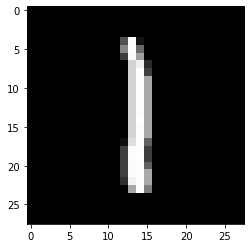

In [3]:
y_train = data[:, 0]
X_train = data[:, 1:]

print(y_train.shape, X_train.shape)

plt.figure(0)

ind = 1000
print(y_train[ind])
plt.imshow(X_train[ind].reshape((28, 28)), cmap='gray')
plt.show()

In [4]:
class KNN:
    def __init__(self, X=None, y=None):
        self.X = X
        self.y = y
    
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def distance(self, x1, x2):
        return np.sqrt(((x1-x2)**2).sum())
        
    def predict(self, x, k=5):
        vals = []
        for ix in range(self.X.shape[0]):
            dist = self.distance(x, self.X[ix, :])
            v = [dist, self.y[ix]]
            vals.append(v)
        updated_vals = sorted(vals, key = lambda x:x[0])
        pred_arr = np.asarray(updated_vals[:k])
        #print(pred_arr)
        #np.unique(array, return_counts) 
        #returns 2 arrays 1st with the unique classes, 
        #array with count of each class
        pred_arr = np.unique(pred_arr[:, 1], return_counts=True)
        pred_ind = pred_arr[1].argmax()
        #argmax() -> returns the index, say index returned = pred_ind
        #to return the predicted class,
        #return the ith element from the first array returned by unique
        #i.e. return pred_arr[0][pred_ind]
        #in this code i am returning the class, as well as 
        #number of occurences of that class
        return pred_arr

In [5]:
knn = KNN()
#X_train is of shape (n_examples, 784)
knn.fit(X_train, y_train)

(array([7., 9.]), array([ 5, 16]))
9.0


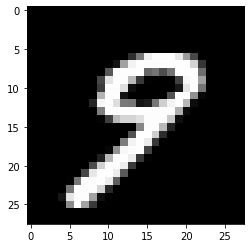

In [8]:
query_ind = int(np.random.random()*X_train.shape[0])
query_image = X_train[query_ind]
result = knn.predict(query_image, k=21)
#classes and corresponding frequencies
print(result)
#index of highest frequency
pred_ind = result[1].argmax()
#class with highest frequecy
prediction = result[0][pred_ind]
print("Prediction by KNN is: ", prediction)
plt.figure(0)
plt.imshow(query_image.reshape((28, 28)), cmap='gray')
plt.show()